In [1]:
import torch, time, dcor, copy, scipy, os
import numpy as np
#import rpy2.robjects as robjects
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, multivariate_t, uniform, beta, poisson
from torch import nn
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from scipy.linalg import eig
from NSDR import NSDR
from plotutils import cum_plot, prop_plot
#from rpy2.robjects import r, numpy2ri
from sklearn.preprocessing import OneHotEncoder
#from rpy2.robjects.packages import importr
#importr("nsdr")
#%load_ext rpy2.ipython
import argparse
import pandas as pd
from time import process_time

from pytorch_lightning import seed_everything
seed_everything(42, workers=True)
torch.use_deterministic_algorithms(True, warn_only=True)

[rank: 0] Global seed set to 42


In [2]:
x_train=pd.read_csv("./application-data-2/x_train.csv")
x_train=x_train.drop('Unnamed: 0', axis=1)
x_train=x_train.to_numpy()
x_test=pd.read_csv("./application-data-2/x_test.csv")
x_test=x_test.drop('Unnamed: 0', axis=1)
x_test=x_test.to_numpy()
y_train=pd.read_csv("./application-data-2/y_train.csv")
y_train=y_train.drop('Unnamed: 0', axis=1)
y_train=y_train.to_numpy()
y_test=pd.read_csv("./application-data-2/y_test.csv")
y_test=y_test.drop('Unnamed: 0', axis=1)
y_test=y_test.to_numpy()

In [3]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))



    return train_test_split(x, y, test_size=test_size)
                
def init_xv_uniform(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)
    
def index_convertion(max_num_list, current_list):
    max_num = list(max_num_list)
    current = list(current_list)
    assert len(max_num) == len(current)
    idx = 0
    prod = 1
    for i in list(range(len(max_num)))[::-1]: ## reversee the oder
        idx = idx + current_list[i] * prod
        prod = prod * max_num_list[i]
    return idx

    

In [5]:
#rep_num = 100
#y_mode_num = 6 ##number of generalized distance
#n = 1000 # training size + test size
#p = 50
#d = 2


iter_num = 40
batch_size = 100 # p * 10

In [6]:

n=x_train.shape[0]
p=x_train.shape[1]

In [7]:
net_seq = NSDR().generate_default_net(p)
net_seq.apply(init_xv_uniform)

model = NSDR(neural_network=net_seq, max_dim=1, method = "seq", adaptive_cv=False, 
             retrain = True, early_stop=False ,debug=False, device="cpu", 
             categorical_y = False, iter_num=iter_num, y_mode=0)
model.fit(x_train, y_train)
y_suff_train=model.transform(x_train)
y_suff_test=model.transform(x_test)



/storage/home/yqt5219/.conda/envs/torch_env/lib/python3.11/site-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float32, 1d, C), array(float32, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


In [8]:
print(dcor.distance_correlation(np.float64(y_suff_train),np.float64(y_train)),
     dcor.distance_correlation(np.float64(y_suff_test),np.float64(y_test)))

0.8541185751072851 0.4726211845529028


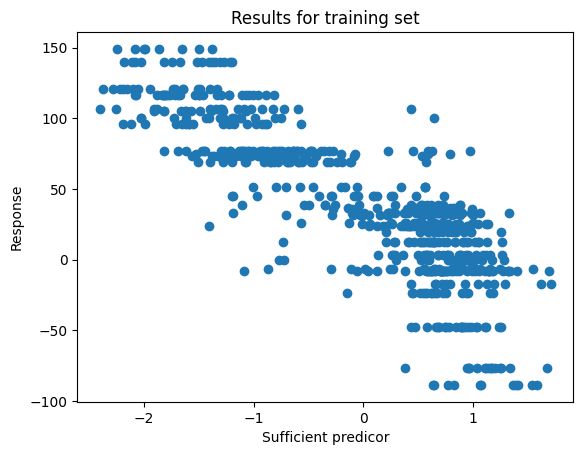

In [9]:
plt.plot(y_suff_train, y_train, 'o', color="C0")
plt.xlabel("Sufficient predicor")
plt.ylabel("Response")
plt.title("Results for training set")
plt.savefig("application-training-GMDD-2-correct.pdf", format="pdf", bbox_inches="tight")
plt.show()

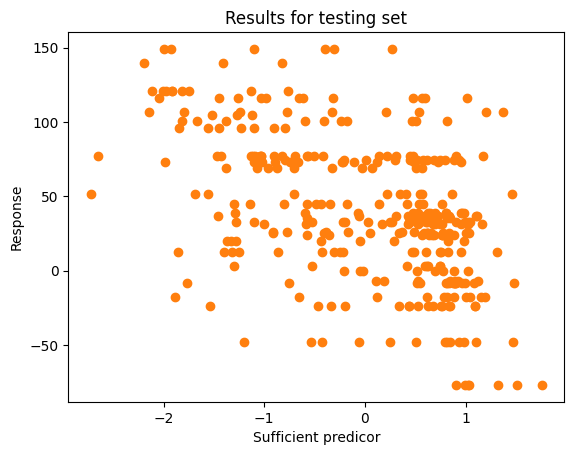

In [10]:
plt.plot(y_suff_test, y_test, 'o', color="C1")
plt.xlabel("Sufficient predicor")
plt.ylabel("Response")
plt.title("Results for testing set")
plt.savefig("application-testing-GMDD-2-correct.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [11]:
y_suff_train_df=pd.DataFrame(y_suff_train)
y_suff_test_df=pd.DataFrame(y_suff_test)
y_suff_train_df.to_csv("./application-results-2/y_suff_train_GMDD-correct.csv")
y_suff_test_df.to_csv("./application-results-2/y_suff_test_GMDD-correct.csv")

In [12]:
dcor_res=[dcor.distance_correlation(np.float64(y_suff_train),np.float64(y_train)),
          dcor.distance_correlation(np.float64(y_suff_test),np.float64(y_test))]
dcor_res_df=pd.DataFrame(dcor_res)
dcor_res_df.to_csv("./application-results-2/dcor_res_GMDD-correct.csv")

In [13]:
#dcor.distance_correlation(np.float64(y_suff_test.detach().numpy()),np.float64(z_test.to_numpy()),method="avl")

In [14]:
#dcor.distance_correlation(np.float64(y_suff_test.detach().numpy()),np.float64(z_test.to_numpy()),method="naive")